In [1]:
#loading the libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm

%matplotlib inline

plt.style.use('bmh')

In [2]:
#File Path
df_1=pd.read_csv('train.csv',sep=',')
df_1=pd.read_csv('train.csv')

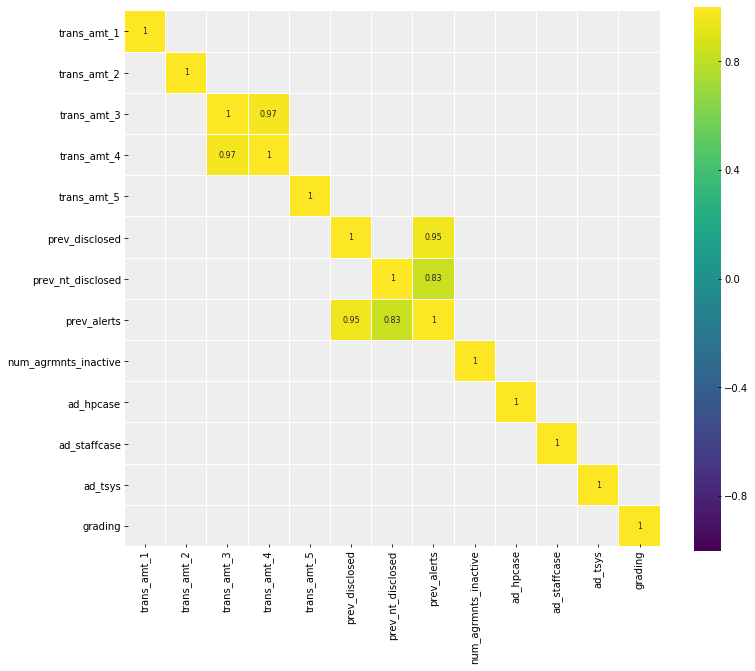

In [4]:
#Feature to feature relationship
corr = df_1.drop('true_alert', axis=1).corr() # We already examined true_alert correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Total amount and transactions

In [5]:
from pandas import DataFrame
df_1['sum_trans_amts'] = df_1[['trans_amt_1',
        'trans_amt_2',
        'trans_amt_3',
        'trans_amt_4',
        'trans_amt_5']].sum(axis=1)

df_1.trans_amt_1.fillna(0,inplace=True)
df_1.trans_amt_2.fillna(0,inplace=True)
df_1.trans_amt_3.fillna(0,inplace=True)
df_1.trans_amt_4.fillna(0,inplace=True)
df_1.trans_amt_5.fillna(0,inplace=True)

In [6]:
df_1['trans_amt_1_new'] = np.where(df_1.trans_amt_1 ==0 , 0, 1)
df_1['trans_amt_2_new'] = np.where(df_1.trans_amt_2 ==0 , 0, 1)
df_1['trans_amt_3_new'] = np.where(df_1.trans_amt_3 ==0 , 0, 1)
df_1['trans_amt_4_new'] = np.where(df_1.trans_amt_4 ==0 , 0, 1)
df_1['trans_amt_5_new'] = np.where(df_1.trans_amt_5 ==0 , 0, 1)

In [7]:
from pandas import DataFrame
df_1['sum_trans_amts_new'] = df_1[['trans_amt_1_new',
        'trans_amt_2_new',
        'trans_amt_3_new',
        'trans_amt_4_new',
        'trans_amt_5_new']].sum(axis=1)

In [8]:
df_1['amt_per_trans'] = df_1['sum_trans_amts']/df_1['sum_trans_amts_new']

In [9]:
df_1.amt_per_trans.fillna(0,inplace=True)

# Amount and type by transaction type

In [10]:
df_1['trans_typ_1_cash_nw'] = np.where(df_1.trans_typ_1 == 'CASH_TRANS', df_1['trans_amt_1'], 0)
df_1['trans_typ_1_bacs_nw'] = np.where(df_1.trans_typ_1 == 'BACS' , df_1['trans_amt_1'], 0)
df_1['trans_typ_1_credit_nw'] = np.where(df_1.trans_typ_1 == 'CREDIT' , df_1['trans_amt_1'], 0)

In [11]:
df_1['trans_typ_2_cash_nw'] = np.where(df_1.trans_typ_2 == 'CASH_TRANS', df_1['trans_amt_2'], 0)
df_1['trans_typ_2_bacs_nw'] = np.where(df_1.trans_typ_2 == 'BACS' , df_1['trans_amt_2'], 0)
df_1['trans_typ_2_credit_nw'] = np.where(df_1.trans_typ_2 == 'CREDIT' , df_1['trans_amt_2'], 0)


In [12]:
df_1['trans_typ_3_cash_nw'] = np.where(df_1.trans_typ_3 == 'CASH_TRANS', df_1['trans_amt_3'], 0)
df_1['trans_typ_3_bacs_nw'] = np.where(df_1.trans_typ_3 == 'BACS' , df_1['trans_amt_3'], 0)
df_1['trans_typ_3_credit_nw'] = np.where(df_1.trans_typ_3 == 'CREDIT' , df_1['trans_amt_3'], 0)

In [13]:
df_1['trans_typ_4_cash_nw'] = np.where(df_1.trans_typ_4 == 'CASH_TRANS', df_1['trans_amt_4'], 0)
df_1['trans_typ_4_bacs_nw'] = np.where(df_1.trans_typ_4 == 'BACS' , df_1['trans_amt_4'], 0)
df_1['trans_typ_4_credit_nw'] = np.where(df_1.trans_typ_4 == 'CREDIT' , df_1['trans_amt_4'], 0)


In [14]:
df_1['trans_typ_5_cash_nw'] = np.where(df_1.trans_typ_5 == 'CASH_TRANS', df_1['trans_amt_5'], 0)
df_1['trans_typ_5_bacs_nw'] = np.where(df_1.trans_typ_5 == 'BACS' , df_1['trans_amt_5'], 0)
df_1['trans_typ_5_credit_nw'] = np.where(df_1.trans_typ_5 == 'CREDIT' , df_1['trans_amt_5'], 0)


In [15]:
from pandas import DataFrame
df_1['sum_trans_typs_bacs_nw'] = df_1[['trans_typ_1_bacs_nw',
        'trans_typ_2_bacs_nw',
        'trans_typ_3_bacs_nw',
        'trans_typ_4_bacs_nw',
        'trans_typ_5_bacs_nw']].sum(axis=1)

In [16]:
df_1['sum_trans_typs_credit_nw'] = df_1[['trans_typ_1_credit_nw',
        'trans_typ_2_credit_nw',
        'trans_typ_3_credit_nw',
        'trans_typ_4_credit_nw',
        'trans_typ_5_credit_nw']].sum(axis=1)

In [17]:
df_1['sum_trans_typs_cash_nw'] = df_1[['trans_typ_1_cash_nw',
        'trans_typ_2_cash_nw',
        'trans_typ_3_cash_nw',
        'trans_typ_4_cash_nw',
        'trans_typ_5_cash_nw']].sum(axis=1)

In [18]:
df_1['sum_trans_typs_cash_nw'].describe()

count     37677.000000
mean       1120.676968
std        7154.968102
min       -2010.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      331000.000000
Name: sum_trans_typs_cash_nw, dtype: float64

In [560]:
#df_1[['sum_trans_typs_cash_nw','sum_trans_typs_credit_nw','sum_trans_typs_bacs_nw']].head(50)

In [19]:
df_1['trans_typ_1_bacs_count'] = np.where(df_1.trans_typ_1_bacs_nw ==0 , 0, 1)
df_1['trans_typ_2_bacs_count'] = np.where(df_1.trans_typ_2_bacs_nw ==0 , 0, 1)
df_1['trans_typ_3_bacs_count'] = np.where(df_1.trans_typ_3_bacs_nw ==0 , 0, 1)
df_1['trans_typ_4_bacs_count'] = np.where(df_1.trans_typ_4_bacs_nw ==0 , 0, 1)
df_1['trans_typ_5_bacs_count'] = np.where(df_1.trans_typ_5_bacs_nw ==0 , 0, 1)

In [20]:
from pandas import DataFrame
df_1['sum_trans_typs_bacs_count'] = df_1[['trans_typ_1_bacs_count',
        'trans_typ_2_bacs_count',
        'trans_typ_3_bacs_count',
        'trans_typ_4_bacs_count',
        'trans_typ_5_bacs_count']].sum(axis=1)

In [21]:
df_1['trans_typ_1_credit_count'] = np.where(df_1.trans_typ_1_credit_nw ==0 , 0, 1)
df_1['trans_typ_2_credit_count'] = np.where(df_1.trans_typ_2_credit_nw ==0 , 0, 1)
df_1['trans_typ_3_credit_count'] = np.where(df_1.trans_typ_3_credit_nw ==0 , 0, 1)
df_1['trans_typ_4_credit_count'] = np.where(df_1.trans_typ_4_credit_nw ==0 , 0, 1)
df_1['trans_typ_5_credit_count'] = np.where(df_1.trans_typ_5_credit_nw ==0 , 0, 1)

In [22]:
from pandas import DataFrame
df_1['sum_trans_typs_credit_count'] = df_1[['trans_typ_1_credit_count',
        'trans_typ_2_credit_count',
        'trans_typ_3_credit_count',
        'trans_typ_4_credit_count',
        'trans_typ_5_credit_count']].sum(axis=1)

In [23]:
df_1['trans_typ_1_cash_count'] = np.where(df_1.trans_typ_1_cash_nw ==0 , 0, 1)
df_1['trans_typ_2_cash_count'] = np.where(df_1.trans_typ_2_cash_nw ==0 , 0, 1)
df_1['trans_typ_3_cash_count'] = np.where(df_1.trans_typ_3_cash_nw ==0 , 0, 1)
df_1['trans_typ_4_cash_count'] = np.where(df_1.trans_typ_4_cash_nw ==0 , 0, 1)
df_1['trans_typ_5_cash_count'] = np.where(df_1.trans_typ_5_cash_nw ==0 , 0, 1)

In [24]:
from pandas import DataFrame
df_1['sum_trans_typs_cash_count'] = df_1[['trans_typ_1_cash_count',
        'trans_typ_2_cash_count',
        'trans_typ_3_cash_count',
        'trans_typ_4_cash_count',
        'trans_typ_5_cash_count']].sum(axis=1)

In [25]:
df_1['amt_per_trans_bacs'] = df_1['sum_trans_typs_bacs_nw']/df_1['sum_trans_typs_bacs_count']

In [26]:
df_1['amt_per_trans_cash'] = df_1['sum_trans_typs_cash_nw']/df_1['sum_trans_typs_cash_count']

In [27]:
df_1['amt_per_trans_credit'] = df_1['sum_trans_typs_credit_nw']/df_1['sum_trans_typs_credit_count']

In [28]:
df_1.amt_per_trans_bacs.fillna(0,inplace=True)

In [29]:
df_1.amt_per_trans_cash.fillna(0,inplace=True)

In [30]:
df_1.amt_per_trans_credit.fillna(0,inplace=True)

In [31]:
df_1.prev_disclosed.fillna(0,inplace=True)
df_1.prev_nt_disclosed.fillna(0,inplace=True)
df_1.prev_alerts.fillna(0,inplace=True)
df_1.num_agrmnts_inactive.fillna(0,inplace=True)
df_1.grading.fillna(0, inplace=True)

df_1.account_type.fillna('missing', inplace=True)
df_1.p_nationality.fillna('missing', inplace=True)
df_1.p_occupation.fillna('missing', inplace=True)
df_1.sub_division.fillna('missing', inplace=True)
df_1.sub_subdivision.fillna('missing', inplace=True)
df_1.sub_branchdept.fillna('missing', inplace=True)
df_1.sub_odivision.fillna('missing', inplace=True)



In [32]:
df_1_onehot = df_1

In [33]:
df_1_onehot.loc[(df_1["p_nationality"]=='unknown'), 'nation'] = 'Unknown'
df_1_onehot.loc[(df_1["p_nationality"]=='United Kingdom'), 'nation'] = 'United Kingdom'
df_1_onehot.loc[(df_1["p_nationality"]!='United Kingdom') & (df_1["p_nationality"]!='unknown'), 'nation'] = 'Others'

In [34]:
df_1_onehot.loc[(df_1["ad_hpcase"]==True), 'hpcase'] = 1
df_1_onehot.loc[(df_1["ad_hpcase"]==False), 'hpcase'] = 0

In [35]:
df_1_onehot.loc[(df_1["ad_staffcase"]==True), 'staffcase'] = 1
df_1_onehot.loc[(df_1["ad_staffcase"]==False), 'staffcase'] = 0

In [36]:
df_1_onehot.loc[(df_1["ad_tsys"]==True), 'tsys'] = 1
df_1_onehot.loc[(df_1["ad_tsys"]==False), 'tsys'] = 0

In [37]:
df_1_onehot.loc[(df_1["p_occupation"]=='selfemployed'), 'occupation'] = 'selfemployed'
df_1_onehot.loc[(df_1["p_occupation"]=='student'), 'occupation'] = 'student'
df_1_onehot.loc[(df_1["p_occupation"]=='unemployed'), 'occupation'] = 'unemployed'
df_1_onehot.loc[(df_1["p_occupation"]!='selfemployed') & (df_1["p_occupation"]!='student') & (df_1["p_occupation"]!='unemployed'), 'occupation'] = 'Not Available'

In [38]:
values_dict = {'PBB - Personal':'PBB','P&BB': 'PBB','PBB - Business': 'PBB','PBB - Private':'PBB','PBB - Premier':'PBB',
               'Services COO':'Services','Services':'Services','CPB - Commercial':'CPB','CPB':'CPB',
               'CPB - Correspondent Banking':'CPB','CPB - Trade Finance':'CPB','CPB - RBSIF':'CPB','CPB - Lombard':'CPB',
               'CPB - RBSI':'CPB','CPB - Private':'CPB','Williams & Glyn':'Others','Ulster Bank RI':'Others',
               'Future Williams and Glyn':'Others','Ulster Bank NI':'Others','Central Functions':'Others',
               'Services CAO':'Others','Group Functions':'Others'
               }

In [39]:
df_1_onehot['division'] = df_1_onehot['sub_division'].map(values_dict)

In [40]:
df_1_onehot = pd.get_dummies(df_1_onehot, columns=['mode','account_type','nation','occupation','division'], 
                             prefix = ['mode', 'account_type','nation','occupation','division'])


In [63]:
#print(df_1_onehot.head())

In [62]:
#df_1_onehot.info()

In [44]:
Y = df_1_onehot['true_alert']

In [116]:
X = df_1_onehot[['trans_amt_1',
'trans_amt_2',
'trans_amt_3',
#'trans_amt_4',
#'trans_amt_5',
'prev_disclosed',
#'prev_nt_disclosed',
'prev_alerts',
'num_agrmnts_inactive',
'grading',
'hpcase',
'staffcase',
'tsys',
'mode_EMAIL_FAX',
#'mode_ONLINEFORMS',
#'mode_SELFGEN',
'account_type_b',
#'account_type_p',
'nation_Others',
'nation_United Kingdom',
#'nation_Unknown',
#'occupation_Not Available',
'occupation_selfemployed',
'occupation_student',
'occupation_unemployed',
'division_CPB',
'division_Others',
'division_PBB',
#'division_Services',
#'sum_trans_amts_new',             
'amt_per_trans',                  
#'trans_typ_1_cash_nw',            
'trans_typ_1_bacs_nw',            
#'trans_typ_1_credit_nw',          
'trans_typ_2_cash_nw',            
#'trans_typ_2_bacs_nw',            
#'trans_typ_2_credit_nw',          
'trans_typ_3_cash_nw',            
#'trans_typ_3_bacs_nw',            
'trans_typ_3_credit_nw',          
#'trans_typ_4_cash_nw',            
#'trans_typ_4_bacs_nw',           
'trans_typ_4_credit_nw',          
#'trans_typ_5_cash_nw',            
'trans_typ_5_bacs_nw',            
#'trans_typ_5_credit_nw',          
'sum_trans_typs_bacs_nw',         
'sum_trans_typs_credit_nw',       
'sum_trans_typs_cash_nw',         
#'trans_typ_1_bacs_count',         
#'trans_typ_2_bacs_count',         
'trans_typ_3_bacs_count',         
#'trans_typ_4_bacs_count',         
'trans_typ_5_bacs_count',         
#'sum_trans_typs_bacs_count',      
#'trans_typ_1_credit_count',       
#'trans_typ_2_credit_count',       
#'trans_typ_3_credit_count',       
'trans_typ_4_credit_count',       
#'trans_typ_5_credit_count',       
#'sum_trans_typs_credit_count',    
#'trans_typ_1_cash_count',         
#'trans_typ_2_cash_count',         
'trans_typ_3_cash_count',         
#'trans_typ_4_cash_count',         
#'trans_typ_5_cash_count',         
#'amt_per_trans_bacs',             
#'sum_trans_typs_cash_count',      
'amt_per_trans_cash',             
#'amt_per_trans_credit'         
]]

In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37677 entries, 0 to 37676
Data columns (total 35 columns):
trans_amt_1                 37677 non-null float64
trans_amt_2                 37677 non-null float64
trans_amt_3                 37677 non-null float64
prev_disclosed              37677 non-null float64
prev_alerts                 37677 non-null float64
num_agrmnts_inactive        37677 non-null float64
grading                     37677 non-null float64
hpcase                      37677 non-null float64
staffcase                   37677 non-null float64
tsys                        37677 non-null float64
mode_EMAIL_FAX              37677 non-null uint8
account_type_b              37677 non-null uint8
nation_Others               37677 non-null uint8
nation_United Kingdom       37677 non-null uint8
occupation_selfemployed     37677 non-null uint8
occupation_student          37677 non-null uint8
occupation_unemployed       37677 non-null uint8
division_CPB                37677 non-

In [118]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.3, random_state=101)

In [133]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#GBM 
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
for a in [30]:
 for b in [0,16]:
  for c in [100]: 
   for d in [200]: 
    
     model = GradientBoostingClassifier(random_state=101,
                                     learning_rate=0.05,
#                                    verbose=1,
                                     max_depth=a,
                                     max_features=b,
                                     n_estimators=c,
                                     min_samples_leaf=d,
                                     min_samples_split=500)



model.fit(X_train, y_train)


prediction_scores_train = model.predict_proba(X_test)[:,1]
      # Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, prediction_scores_train)

print(auc(fpr, tpr))

0.668345018011


In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
logModel = LogisticRegression()


In [136]:
logModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [137]:
predictions = logModel.predict(X_test)

In [138]:
from sklearn.metrics import classification_report

In [139]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.55      0.68      0.61      5467
          1       0.61      0.47      0.53      5837

avg / total       0.58      0.57      0.57     11304



In [140]:
from sklearn.metrics import confusion_matrix

In [141]:
confusion_matrix(y_test, predictions)

array([[3717, 1750],
       [3088, 2749]], dtype=int64)

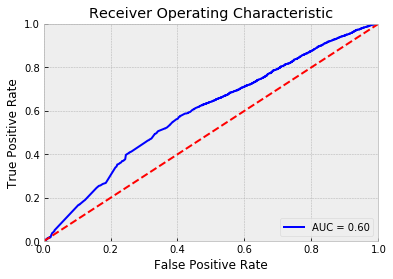

In [142]:
from sklearn import metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [110]:
# Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)


In [60]:
model_features = list(X_train.columns.values)
model_features 
for feature in zip(model_features, clf.feature_importances_):
    print(feature) 

from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.05)

# Train the selector
sfm.fit(X_train, y_train) 

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(model_features[feature_list_index]) 
# Transform the data to create a new dataset containing only the most important features

('trans_amt_1', 0.19592458645732089)
('prev_disclosed', 0.0093776437934067584)
('prev_alerts', 0.018689835038021338)
('num_agrmnts_inactive', 0.057073984657942299)
('grading', 0.032497885865956616)
('hpcase', 0.027585438094325333)
('staffcase', 0.0039466626473296761)
('tsys', 0.01114860487461769)
('mode_EMAIL_FAX', 0.0074849717224308911)
('mode_ONLINEFORMS', 0.008089668392474254)
('account_type_b', 0.016387932681085439)
('nation_Others', 0.015770181535396464)
('nation_United Kingdom', 0.024729722874449779)
('occupation_selfemployed', 0.011998482194952175)
('occupation_student', 0.0083885630858661943)
('occupation_unemployed', 0.0095119567513393035)
('division_CPB', 0.0032166464223318597)
('division_Others', 0.018696780154751329)
('division_PBB', 0.035055031544901541)
('sum_trans_amts_new', 0.051231220730009866)
('amt_per_trans', 0.2141755033979908)
('sum_trans_typs_bacs_nw', 0.029491744298857942)
('sum_trans_typs_credit_nw', 0.020532989071376302)
('sum_trans_typs_cash_nw', 0.0297411401

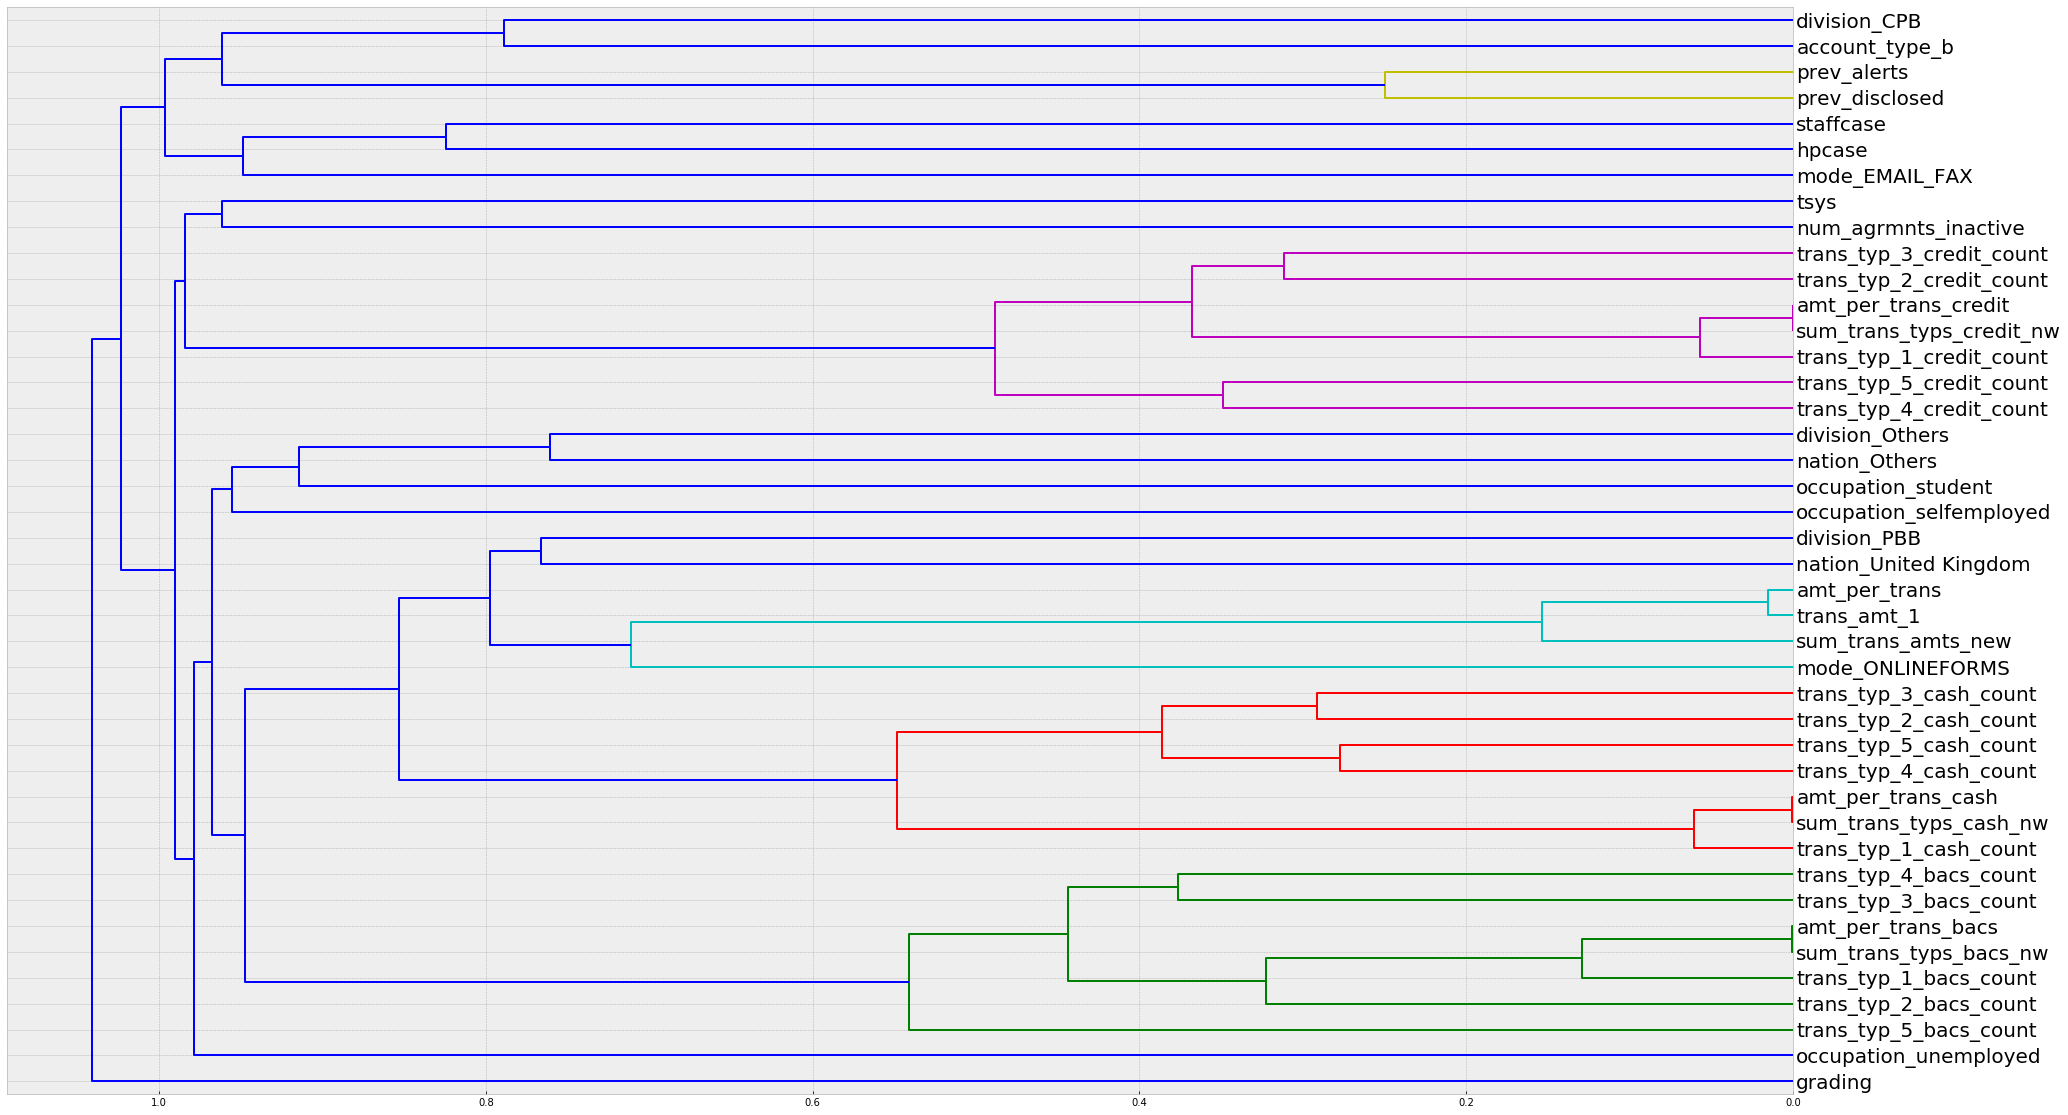

In [61]:
# Check feature overlap 
import scipy as sp
from scipy.cluster import hierarchy as hc

corr = np.round(sp.stats.spearmanr(X_train).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(32,20))
dendrogram = hc.dendrogram(z, labels=X_train.columns, orientation='left', leaf_font_size=20)
plt.show() 

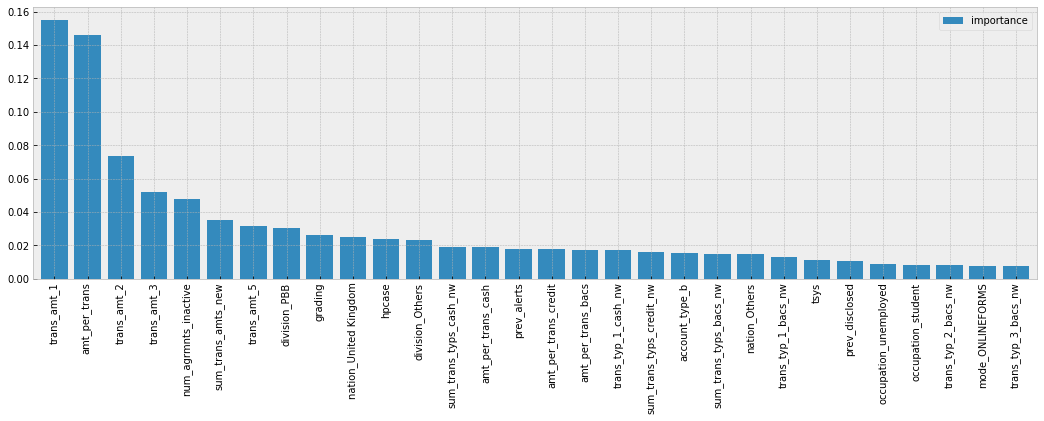

In [621]:
# Import the random forest model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)



#feature selection using Random selection
feature_imp=pd.DataFrame(rf.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance',
                                ascending=False)
top_30=feature_imp.head(n=30)
top_30.plot(kind='bar',width=.8,figsize=(18,5))
plt.show()

0.667199029522


In [64]:
test=pd.read_csv('//Gbmlvfilfs06n02.rbsres01.net/Home2$/VermaNw/Profile/Desktop/IMLSR/X_test.csv',index_col=0)
test.head()


,trans_amt_1,trans_amt_2,trans_amt_3,trans_amt_4,trans_amt_5,prev_disclosed,prev_nt_disclosed,prev_alerts,num_agrmnts_inactive,ad_hpcase,...,p_occupation,sub_division,sub_subdivision,sub_branchdept,sub_odivision,trans_typ_1,trans_typ_2,trans_typ_3,trans_typ_4,trans_typ_5
alert_id,,,,,,,,,,,,,,,,,,,,,
5666EA0F-191,6750.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,False,...,NaN,Ulster Bank RI,Business Direct,NaN,Ulster Bank RI,CREDIT,NaN,NaN,NaN,NaN
3B3F8910-C7C,9500.0,800.0,11000.0,0.0,0.0,NaN,NaN,NaN,0.0,True,...,unknown,Ulster Bank RI,Branch & Private,NaN,Ulster Bank RI,PAYMENT_IN,CASH_IN,CASH_OUT,NaN,NaN
59F0EC5A-5BF,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,False,...,unknown,Services COO,Shared Operations,Nominated Office,Personal banking,NaN,NaN,NaN,NaN,NaN
515FCA60-3D6,NaN,110.0,NaN,499.0,499.0,NaN,NaN,NaN,0.0,False,...,unknown,PBB - Personal,Branch Banking,NaN,Personal banking,CREDIT,CASH_OUT,CREDIT,CASH_IN,CASH_OUT
59DB4A90-C0F,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,True,...,NaN,CPB - Correspondent Banking,CPB - Correspondent Banking,NaN,Correspondent Banking,CHAPS,CHAPS,CHAPS,CHAPS,CHAPS


In [65]:
submission.head()

NameError: name 'submission' is not defined

# Testing dataset preparation

In [66]:
test=pd.read_csv('//Gbmlvfilfs06n02.rbsres01.net/Home2$/VermaNw/Profile/Desktop/IMLSR/X_test.csv')
test.head()

,alert_id,trans_amt_1,trans_amt_2,trans_amt_3,trans_amt_4,trans_amt_5,prev_disclosed,prev_nt_disclosed,prev_alerts,num_agrmnts_inactive,...,p_occupation,sub_division,sub_subdivision,sub_branchdept,sub_odivision,trans_typ_1,trans_typ_2,trans_typ_3,trans_typ_4,trans_typ_5
0,5666EA0F-191,6750.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,Ulster Bank RI,Business Direct,NaN,Ulster Bank RI,CREDIT,NaN,NaN,NaN,NaN
1,3B3F8910-C7C,9500.0,800.0,11000.0,0.0,0.0,NaN,NaN,NaN,0.0,...,unknown,Ulster Bank RI,Branch & Private,NaN,Ulster Bank RI,PAYMENT_IN,CASH_IN,CASH_OUT,NaN,NaN
2,59F0EC5A-5BF,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,unknown,Services COO,Shared Operations,Nominated Office,Personal banking,NaN,NaN,NaN,NaN,NaN
3,515FCA60-3D6,NaN,110.0,NaN,499.0,499.0,NaN,NaN,NaN,0.0,...,unknown,PBB - Personal,Branch Banking,NaN,Personal banking,CREDIT,CASH_OUT,CREDIT,CASH_IN,CASH_OUT
4,59DB4A90-C0F,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,...,NaN,CPB - Correspondent Banking,CPB - Correspondent Banking,NaN,Correspondent Banking,CHAPS,CHAPS,CHAPS,CHAPS,CHAPS


In [69]:

from pandas import DataFrame
test['sum_trans_amts'] = test[['trans_amt_1',
        'trans_amt_2',
        'trans_amt_3',
        'trans_amt_4',
        'trans_amt_5']].sum(axis=1)

test.trans_amt_1.fillna(0,inplace=True)
test.trans_amt_2.fillna(0,inplace=True)
test.trans_amt_3.fillna(0,inplace=True)
test.trans_amt_4.fillna(0,inplace=True)
test.trans_amt_5.fillna(0,inplace=True)

test['trans_amt_1_new'] = np.where(test.trans_amt_1 ==0 , 0, 1)
test['trans_amt_2_new'] = np.where(test.trans_amt_2 ==0 , 0, 1)
test['trans_amt_3_new'] = np.where(test.trans_amt_3 ==0 , 0, 1)
test['trans_amt_4_new'] = np.where(test.trans_amt_4 ==0 , 0, 1)
test['trans_amt_5_new'] = np.where(test.trans_amt_5 ==0 , 0, 1)

from pandas import DataFrame
test['sum_trans_amts_new'] = test[['trans_amt_1_new',
        'trans_amt_2_new',
        'trans_amt_3_new',
        'trans_amt_4_new',
        'trans_amt_5_new']].sum(axis=1)

test['amt_per_trans'] = test['sum_trans_amts']/test['sum_trans_amts_new']

test.amt_per_trans.fillna(0,inplace=True)

test['trans_typ_1_cash_nw'] = np.where(test.trans_typ_1 == 'CASH_TRANS', test['trans_amt_1'], 0)
test['trans_typ_1_bacs_nw'] = np.where(test.trans_typ_1 == 'BACS' , test['trans_amt_1'], 0)
test['trans_typ_1_credit_nw'] = np.where(test.trans_typ_1 == 'CREDIT' , test['trans_amt_1'], 0)

test['trans_typ_2_cash_nw'] = np.where(test.trans_typ_2 == 'CASH_TRANS', test['trans_amt_2'], 0)
test['trans_typ_2_bacs_nw'] = np.where(test.trans_typ_2 == 'BACS' , test['trans_amt_2'], 0)
test['trans_typ_2_credit_nw'] = np.where(test.trans_typ_2 == 'CREDIT' , test['trans_amt_2'], 0)

test['trans_typ_3_cash_nw'] = np.where(test.trans_typ_3 == 'CASH_TRANS', test['trans_amt_3'], 0)
test['trans_typ_3_bacs_nw'] = np.where(test.trans_typ_3 == 'BACS' , test['trans_amt_3'], 0)
test['trans_typ_3_credit_nw'] = np.where(test.trans_typ_3 == 'CREDIT' , test['trans_amt_3'], 0)

test['trans_typ_4_cash_nw'] = np.where(test.trans_typ_4 == 'CASH_TRANS', test['trans_amt_4'], 0)
test['trans_typ_4_bacs_nw'] = np.where(test.trans_typ_4 == 'BACS' , test['trans_amt_4'], 0)
test['trans_typ_4_credit_nw'] = np.where(test.trans_typ_4 == 'CREDIT' , test['trans_amt_4'], 0)

test['trans_typ_5_cash_nw'] = np.where(test.trans_typ_5 == 'CASH_TRANS', test['trans_amt_5'], 0)
test['trans_typ_5_bacs_nw'] = np.where(test.trans_typ_5 == 'BACS' , test['trans_amt_5'], 0)
test['trans_typ_5_credit_nw'] = np.where(test.trans_typ_5 == 'CREDIT' , test['trans_amt_5'], 0)

from pandas import DataFrame
test['sum_trans_typs_bacs_nw'] = test[['trans_typ_1_bacs_nw',
        'trans_typ_2_bacs_nw',
        'trans_typ_3_bacs_nw',
        'trans_typ_4_bacs_nw',
        'trans_typ_5_bacs_nw']].sum(axis=1)

test['sum_trans_typs_credit_nw'] = test[['trans_typ_1_credit_nw',
        'trans_typ_2_credit_nw',
        'trans_typ_3_credit_nw',
        'trans_typ_4_credit_nw',
        'trans_typ_5_credit_nw']].sum(axis=1)

test['sum_trans_typs_cash_nw'] = test[['trans_typ_1_cash_nw',
        'trans_typ_2_cash_nw',
        'trans_typ_3_cash_nw',
        'trans_typ_4_cash_nw',
        'trans_typ_5_cash_nw']].sum(axis=1)


test['trans_typ_1_bacs_count'] = np.where(test.trans_typ_1_bacs_nw ==0 , 0, 1)
test['trans_typ_2_bacs_count'] = np.where(test.trans_typ_2_bacs_nw ==0 , 0, 1)
test['trans_typ_3_bacs_count'] = np.where(test.trans_typ_3_bacs_nw ==0 , 0, 1)
test['trans_typ_4_bacs_count'] = np.where(test.trans_typ_4_bacs_nw ==0 , 0, 1)
test['trans_typ_5_bacs_count'] = np.where(test.trans_typ_5_bacs_nw ==0 , 0, 1)

from pandas import DataFrame
test['sum_trans_typs_bacs_count'] = test[['trans_typ_1_bacs_count',
        'trans_typ_2_bacs_count',
        'trans_typ_3_bacs_count',
        'trans_typ_4_bacs_count',
        'trans_typ_5_bacs_count']].sum(axis=1)

test['trans_typ_1_credit_count'] = np.where(test.trans_typ_1_credit_nw ==0 , 0, 1)
test['trans_typ_2_credit_count'] = np.where(test.trans_typ_2_credit_nw ==0 , 0, 1)
test['trans_typ_3_credit_count'] = np.where(test.trans_typ_3_credit_nw ==0 , 0, 1)
test['trans_typ_4_credit_count'] = np.where(test.trans_typ_4_credit_nw ==0 , 0, 1)
test['trans_typ_5_credit_count'] = np.where(test.trans_typ_5_credit_nw ==0 , 0, 1)

from pandas import DataFrame
test['sum_trans_typs_credit_count'] = test[['trans_typ_1_credit_count',
        'trans_typ_2_credit_count',
        'trans_typ_3_credit_count',
        'trans_typ_4_credit_count',
        'trans_typ_5_credit_count']].sum(axis=1)

test['trans_typ_1_cash_count'] = np.where(test.trans_typ_1_cash_nw ==0 , 0, 1)
test['trans_typ_2_cash_count'] = np.where(test.trans_typ_2_cash_nw ==0 , 0, 1)
test['trans_typ_3_cash_count'] = np.where(test.trans_typ_3_cash_nw ==0 , 0, 1)
test['trans_typ_4_cash_count'] = np.where(test.trans_typ_4_cash_nw ==0 , 0, 1)
test['trans_typ_5_cash_count'] = np.where(test.trans_typ_5_cash_nw ==0 , 0, 1)

from pandas import DataFrame
test['sum_trans_typs_cash_count'] = test[['trans_typ_1_cash_count',
        'trans_typ_2_cash_count',
        'trans_typ_3_cash_count',
        'trans_typ_4_cash_count',
        'trans_typ_5_cash_count']].sum(axis=1)

test['amt_per_trans_bacs'] = test['sum_trans_typs_bacs_nw']/test['sum_trans_typs_bacs_count']

test['amt_per_trans_cash'] = test['sum_trans_typs_cash_nw']/test['sum_trans_typs_cash_count']

test['amt_per_trans_credit'] = test['sum_trans_typs_credit_nw']/test['sum_trans_typs_credit_count']

test.amt_per_trans_bacs.fillna(0,inplace=True)

test.amt_per_trans_cash.fillna(0,inplace=True)

test.amt_per_trans_credit.fillna(0,inplace=True)

test.prev_disclosed.fillna(0,inplace=True)
test.prev_nt_disclosed.fillna(0,inplace=True)
test.prev_alerts.fillna(0,inplace=True)
test.num_agrmnts_inactive.fillna(0,inplace=True)
test.grading.fillna(0, inplace=True)

test.account_type.fillna('missing', inplace=True)
test.p_nationality.fillna('missing', inplace=True)
test.p_occupation.fillna('missing', inplace=True)
test.sub_division.fillna('missing', inplace=True)
test.sub_subdivision.fillna('missing', inplace=True)
test.sub_branchdept.fillna('missing', inplace=True)
test.sub_odivision.fillna('missing', inplace=True)

test_onehot = test

test_onehot.loc[(test["p_nationality"]=='unknown'), 'nation'] = 'Unknown'
test_onehot.loc[(test["p_nationality"]=='United Kingdom'), 'nation'] = 'United Kingdom'
test_onehot.loc[(test["p_nationality"]!='United Kingdom') & (test["p_nationality"]!='unknown'), 'nation'] = 'Others'

test_onehot.loc[(test["ad_hpcase"]==True), 'hpcase'] = 1
test_onehot.loc[(test["ad_hpcase"]==False), 'hpcase'] = 0

test_onehot.loc[(test["ad_staffcase"]==True), 'staffcase'] = 1
test_onehot.loc[(test["ad_staffcase"]==False), 'staffcase'] = 0

test_onehot.loc[(test["ad_tsys"]==True), 'tsys'] = 1
test_onehot.loc[(test["ad_tsys"]==False), 'tsys'] = 0

test_onehot.loc[(test["p_occupation"]=='selfemployed'), 'occupation'] = 'selfemployed'
test_onehot.loc[(test["p_occupation"]=='student'), 'occupation'] = 'student'
test_onehot.loc[(test["p_occupation"]=='unemployed'), 'occupation'] = 'unemployed'
test_onehot.loc[(test["p_occupation"]!='selfemployed') & (test["p_occupation"]!='student') & (test["p_occupation"]!='unemployed'), 'occupation'] = 'Not Available'

values_dict = {'PBB - Personal':'PBB','P&BB': 'PBB','PBB - Business': 'PBB','PBB - Private':'PBB','PBB - Premier':'PBB',
               'Services COO':'Services','Services':'Services','CPB - Commercial':'CPB','CPB':'CPB',
               'CPB - Correspondent Banking':'CPB','CPB - Trade Finance':'CPB','CPB - RBSIF':'CPB','CPB - Lombard':'CPB',
               'CPB - RBSI':'CPB','CPB - Private':'CPB','Williams & Glyn':'Others','Ulster Bank RI':'Others',
               'Future Williams and Glyn':'Others','Ulster Bank NI':'Others','Central Functions':'Others',
               'Services CAO':'Others','Group Functions':'Others'
               }

test_onehot['division'] = test_onehot['sub_division'].map(values_dict)

test_onehot = pd.get_dummies(test_onehot, columns=['mode','account_type','nation','occupation','division'], 
                             prefix = ['mode', 'account_type','nation','occupation','division'])

In [70]:
X = test_onehot[['trans_amt_1',
#'trans_amt_2',
#'trans_amt_3',
#'trans_amt_4',
#'trans_amt_5',
'prev_disclosed',
#'prev_nt_disclosed',
'prev_alerts',
'num_agrmnts_inactive',
'grading',
'hpcase',
'staffcase',
'tsys',
'mode_EMAIL_FAX',
'mode_ONLINEFORMS',
#'mode_SELFGEN',
'account_type_b',
#'account_type_p',
'nation_Others',
'nation_United Kingdom',
#'nation_Unknown',
#'occupation_Not Available',
'occupation_selfemployed',
'occupation_student',
'occupation_unemployed',
'division_CPB',
'division_Others',
'division_PBB',
#'division_Services',
'sum_trans_amts_new',             
'amt_per_trans',                  
#'trans_typ_1_cash_nw',            
#'trans_typ_1_bacs_nw',            
#'trans_typ_1_credit_nw',          
#'trans_typ_2_cash_nw',            
#'trans_typ_2_bacs_nw',            
#'trans_typ_2_credit_nw',          
#'trans_typ_3_cash_nw',            
#'trans_typ_3_bacs_nw',            
#'trans_typ_3_credit_nw',          
#'trans_typ_4_cash_nw',            
#'trans_typ_4_bacs_nw',           
#'trans_typ_4_credit_nw',          
#'trans_typ_5_cash_nw',            
#'trans_typ_5_bacs_nw',            
#'trans_typ_5_credit_nw',          
'sum_trans_typs_bacs_nw',         
'sum_trans_typs_credit_nw',       
'sum_trans_typs_cash_nw',         
'trans_typ_1_bacs_count',         
'trans_typ_2_bacs_count',         
'trans_typ_3_bacs_count',         
'trans_typ_4_bacs_count',         
'trans_typ_5_bacs_count',         
#'sum_trans_typs_bacs_count',      
'trans_typ_1_credit_count',       
'trans_typ_2_credit_count',       
'trans_typ_3_credit_count',       
'trans_typ_4_credit_count',       
'trans_typ_5_credit_count',       
#'sum_trans_typs_credit_count',    
'trans_typ_1_cash_count',         
'trans_typ_2_cash_count',         
'trans_typ_3_cash_count',         
'trans_typ_4_cash_count',         
'trans_typ_5_cash_count',         
'amt_per_trans_bacs',             
#'sum_trans_typs_cash_count',      
'amt_per_trans_cash',             
'amt_per_trans_credit'         
]]

In [ ]:
submission = pd.read_csv('//Gbmlvfilfs06n02.rbsres01.net/Home2$/VermaNw/Profile/Desktop/IMLSR/sample_submission.csv')
submission['pred'] = model.predict_proba(X_1_test)[:, 1]
submission.to_csv('//Gbmlvfilfs06n02.rbsres01.net/Home2$/VermaNw/Profile/Desktop/IMLSR/sample_submission_nv.csv')

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logModel = LogisticRegression()

In [73]:
logModel.fit(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
predictions = logModel.predict(X_train)

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_train, predictions))

             precision    recall  f1-score   support

          0       0.56      0.56      0.56     12750
          1       0.59      0.59      0.59     13623

avg / total       0.57      0.57      0.57     26373



In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_train, predictions)

array([[7121, 5629],
       [5613, 8010]], dtype=int64)

C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


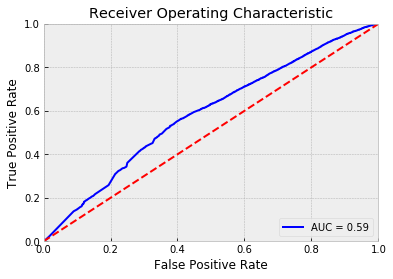

In [79]:
from sklearn import metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logModel.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

# plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
# Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test,y_test)
predictions = clf.predict(X_train)

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 20 (0.202423)
2. feature 0 (0.184647)
3. feature 19 (0.064090)
4. feature 3 (0.060774)
5. feature 4 (0.037596)
6. feature 40 (0.031223)
7. feature 23 (0.029798)
8. feature 18 (0.029536)
9. feature 39 (0.025778)
10. feature 5 (0.025146)
11. feature 12 (0.024838)
12. feature 21 (0.023683)
13. feature 2 (0.023400)
14. feature 17 (0.022196)
15. feature 22 (0.020637)
16. feature 11 (0.018174)
17. feature 41 (0.018169)
18. feature 10 (0.017418)
19. feature 13 (0.013603)
20. feature 1 (0.011548)
21. feature 9 (0.011082)
22. feature 15 (0.010730)
23. feature 7 (0.010226)
24. feature 14 (0.010218)
25. feature 25 (0.005586)
26. feature 8 (0.005555)
27. feature 24 (0.005515)
28. feature 35 (0.005372)
29. feature 34 (0.005072)
30. feature 29 (0.005068)
31. feature 30 (0.004544)
32. feature 27 (0.004492)
33. feature 26 (0.004474)
34. feature 16 (0.003629)
35. feature 28 (0.003532)
36. feature 38 (0.003373)


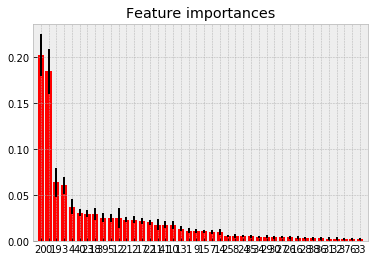

In [81]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

#from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = RandomForestClassifier()

forest.fit(X_test,y_test)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()

In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [83]:
#GBM 
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
for a in [20]:
 for b in [0,16]:
  for c in [100]: 
   for d in [200]: 
    
     model = GradientBoostingClassifier(random_state=101,
                                     learning_rate=0.07,
#                                    verbose=1,
                                     max_depth=a,
                                     max_features=b,
                                     n_estimators=c,
                                     min_samples_leaf=d,
                                     min_samples_split=500)



model.fit(X_test, y_test)


prediction_scores_test = model.predict_proba(X_train)[:,1]
      # Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, prediction_scores_test)

print(auc(fpr, tpr))

0.660659763693
